<center><img src="https://cdn.thewirecutter.com/wp-content/media/2022/09/plant-ID-apps-2048px-6025-2x1-1.jpg?auto=webp&quality=60&crop=2:1&width=1024"></center>

<b><h1><center><span style='background :lightblue' >Convolutional Neural Network</span></center></h1></b>

<h2><center><span style='background :lightgreen' >Plants Seedling Classification</span></center></h2>


### **Background and Context:**
In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

### **Objective:**

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

### **Data Description:**

- This dataset contains images of unique plants belonging to 12 different species.
-- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## **Importing the necessary libraries**

In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Reading the dataset**

In [2]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Colab_Notebooks/CNN_Project_Files/images.npy')

# Load the labels file of the dataset
Label = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CNN_Project_Files/Labels.csv')

## **Overview of the dataset**


Let's print the shape of the images and labels 

In [4]:
print(images.shape)
print(Label.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

In [6]:
Label.describe()

,Label
count,4750
unique,12
top,Loose Silky-bent
freq,654


In [7]:
Label.dtypes

Label    object
dtype: object

<b> Checking for data imbalance

In [8]:
Label.sample(15, random_state=42)

,Label
3817,Maize
1075,Shepherds Purse
296,Small-flowered Cranesbill
2045,Charlock
1703,Common Chickweed
4615,Loose Silky-bent
3673,Maize
3458,Sugar beet
1345,Common wheat
2088,Charlock


In [9]:
#displaying how many images of each plant are in the dataset
Label.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

In [10]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

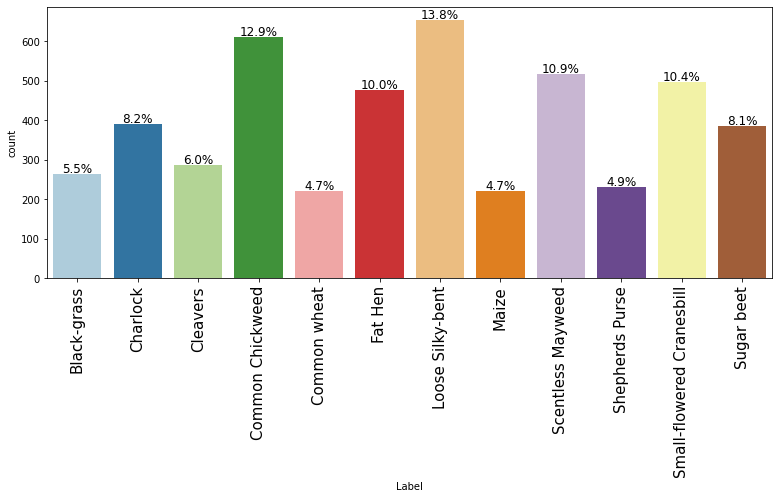

In [12]:
labeled_barplot(Label, "Label", perc=True)

### Observation

- As you can see from the above plot, the dataset is not balanced. 
- There are different percentage of images in each of the 12 categories.
- Loose Silky-bent is the category with the highest count then Common Chickweed
- Three categories "Fat Hen", "Scentless Mayweed", "Small-flowered Cranesbill" have almost same number of images
- Also "Charlock", "Sugar beet" have almost same count
- The other five categories are almost in equal count and with less percentage.

In [13]:
#listing the names of each class of plant
classes = np.unique(Label).tolist()
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [14]:
#storing the number of classes in a variable
num_classes = len(classes)
num_classes

12

## **Exploratory Data Analysis** 

### Plotting images using OpenCV and matplotlib

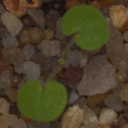

In [15]:
cv2_imshow(images[5])

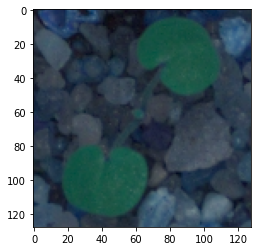

In [16]:
plt.imshow(images[5])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [17]:
def plot_images(images,labels):
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

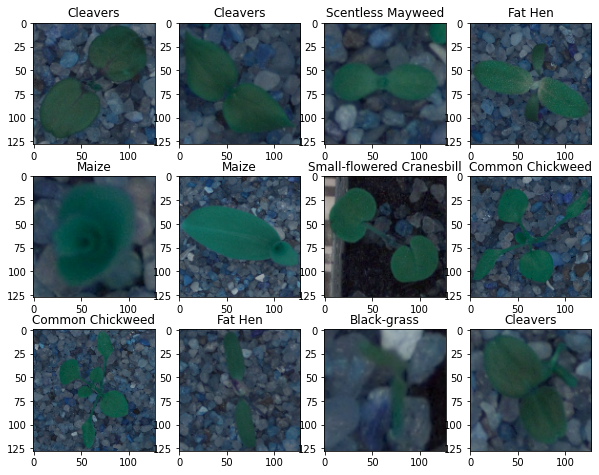

In [19]:
plot_images(images,Label)

In [20]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [21]:
def plot_images(images,labels):
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

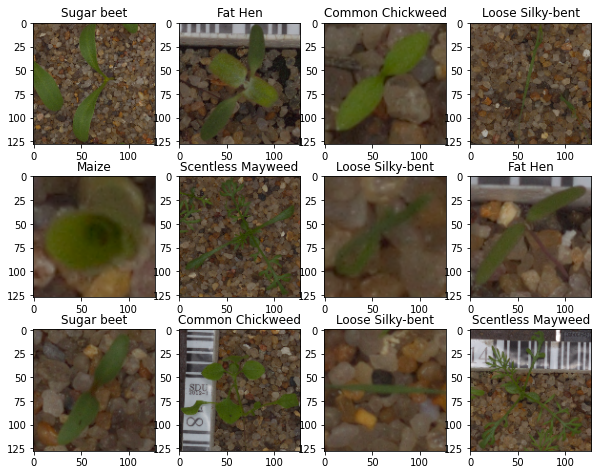

In [23]:
plot_images(images,Label)

In [26]:
# Creating a dataframe capturing shape of each image
imageinfo = pd.DataFrame(index=np.arange(0, len(images)), columns=["width", "height", "species"])
n_images = len(images)
    
for n in range(0, n_images):
  image = images[n]
  imageinfo.loc[n, "width"] = image.shape[0]
  imageinfo.loc[n, "height"] = image.shape[1]
  imageinfo.loc[n, "species"] = Label['Label'][n]

imageinfo.sample(5, random_state= 42)

,width,height,species
3817,128,128,Maize
1075,128,128,Shepherds Purse
296,128,128,Small-flowered Cranesbill
2045,128,128,Charlock
1703,128,128,Common Chickweed


## Data Pre-Processing

### Resizing images 
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64. But for better performance we are trying with the original size as there are lot of different plants. 

In [ ]:
#images_decreased=[]
#height = 64
#width = 64
#dimensions = (width, height)  
#for i in range(len(images)):
#  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

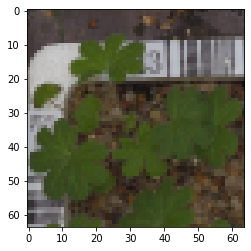

In [ ]:
#plt.imshow(images_decreased[3])

## Visualizing images using Gaussian Blur 

In [27]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))


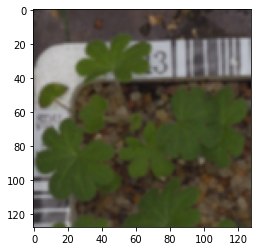

In [28]:
plt.imshow(images_gb[3])

- Since its a plant classification, trying to find the accuracy with blurred image as it won't impact much

## **Splitting the dataset**

- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.


In [29]:
from sklearn.model_selection import train_test_split
#X_temp, X_test, y_temp, y_test = train_test_split(np.array(images),Label , test_size=0.1, random_state=42,stratify=Label)
#X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),Label , test_size=0.1, random_state=42,stratify=Label)
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_gb),Label , test_size=0.1, random_state=42,stratify=Label)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)


In [30]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 128, 128, 3) (3847, 1)
(428, 128, 128, 3) (428, 1)
(475, 128, 128, 3) (475, 1)


### Trying Class_weight since the data is imbalanced

In [31]:
from sklearn.utils import class_weight    

labelList = Label.Label.unique()    
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))
class_weights

{0: 0.7974709784411277,
 1: 0.8348524305555556,
 2: 1.714349376114082,
 3: 1.7909683426443204,
 4: 0.6476430976430977,
 5: 1.0145042194092826,
 6: 1.3818247126436782,
 7: 0.7669457735247209,
 8: 1.0275106837606838,
 9: 1.7909683426443204,
 10: 1.5050860719874803,
 11: 0.604874213836478}

## **Making the data compatible:**

- Convert labels from names to one hot vectors
- Normalizing the values


## Encoding the target labels

In [32]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [33]:
y_test_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

## Data Normalization
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [34]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0


## **Model Building - Convolutional Neural Network (CNN)**
Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data. 

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [35]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [36]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>


## Model 1-Regular CNN

In [37]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
# model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 16)                5

In [38]:
history = model.fit(
            X_train_normalized, y_train_encoded,class_weight=class_weights,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 17s - loss: 2.9005 - accuracy: 0.1570 - val_loss: 2.3341 - val_accuracy: 0.2360 - 17s/epoch - 136ms/step
Epoch 2/30
121/121 - 2s - loss: 2.6383 - accuracy: 0.2610 - val_loss: 2.1398 - val_accuracy: 0.3528 - 2s/epoch - 17ms/step
Epoch 3/30
121/121 - 2s - loss: 2.5063 - accuracy: 0.2820 - val_loss: 2.0417 - val_accuracy: 0.3528 - 2s/epoch - 18ms/step
Epoch 4/30
121/121 - 2s - loss: 2.4322 - accuracy: 0.2867 - val_loss: 1.9834 - val_accuracy: 0.3575 - 2s/epoch - 17ms/step
Epoch 5/30
121/121 - 2s - loss: 2.4017 - accuracy: 0.2836 - val_loss: 1.9456 - val_accuracy: 0.3551 - 2s/epoch - 17ms/step
Epoch 6/30
121/121 - 2s - loss: 2.3746 - accuracy: 0.2833 - val_loss: 1.9376 - val_accuracy: 0.3598 - 2s/epoch - 19ms/step
Epoch 7/30
121/121 - 2s - loss: 2.3603 - accuracy: 0.2802 - val_loss: 1.9283 - val_accuracy: 0.3551 - 2s/epoch - 18ms/step
Epoch 8/30
121/121 - 2s - loss: 2.3139 - accuracy: 0.2872 - val_loss: 1.8825 - val_accuracy: 0.3598 - 2s/epoch - 17ms/step
Epoch 9/30
12

### **Model Evaluation**

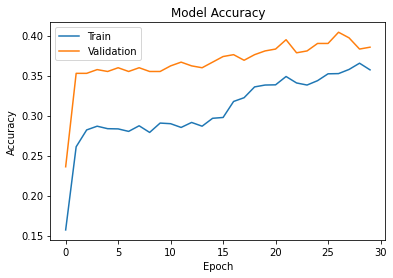

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.8309 - accuracy: 0.3937 - 309ms/epoch - 21ms/step


In [41]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 7ms/step


In [42]:
y_pred

array([[1.3735523e-02, 7.1296059e-02, 9.1448896e-02, ..., 1.0419161e-01,
        4.9266092e-02, 3.9722946e-02],
       [3.0741423e-05, 7.3212527e-02, 1.5384051e-01, ..., 2.6072325e-02,
        6.7152113e-01, 8.6396141e-03],
       [3.1793941e-05, 7.3761977e-02, 1.5466844e-01, ..., 2.6426943e-02,
        6.6912639e-01, 8.7623717e-03],
       ...,
       [2.1363865e-01, 7.4632425e-11, 2.5633981e-06, ..., 5.4262315e-12,
        4.7762475e-11, 5.5438094e-04],
       [1.3735523e-02, 7.1296059e-02, 9.1448896e-02, ..., 1.0419161e-01,
        4.9266092e-02, 3.9722946e-02],
       [6.1922353e-03, 1.4975138e-01, 2.1742523e-01, ..., 1.5352477e-01,
        1.9807146e-01, 5.6506377e-02]], dtype=float32)

In [43]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

In [44]:
y_pred_arg

array([ 3, 10, 10, 10,  3, 10,  5,  6, 10, 10,  6,  3,  6, 10,  3,  2,  6,
        6,  3,  3, 10,  5,  2,  3,  6,  3,  3,  6,  3,  5,  3,  3,  6,  3,
        6,  6,  2,  6,  6,  6,  6,  3,  5, 10,  3,  3,  5, 10,  3,  6,  2,
        3,  6, 10,  3,  2,  3,  3,  3,  3,  6, 10,  3, 10,  8,  6,  3, 10,
        3, 10,  3, 10,  5,  6, 10, 10,  8, 10,  8,  6,  2, 10,  6,  6,  3,
        3,  2,  3,  3,  6,  3,  6, 10,  5,  3,  6, 10,  3,  3, 10,  5, 10,
        3,  2, 10,  3,  3,  6, 10,  2,  3,  3,  3, 10,  5,  6,  3,  3,  3,
       10,  3,  6,  6,  5, 10,  3,  6,  6,  3,  3,  5,  6,  6,  6,  6,  3,
        6,  6,  5,  6,  5,  6,  8, 10,  3,  3,  6,  3, 10,  3,  3, 10, 10,
        3, 10,  2,  3,  6,  6,  6,  3,  8,  6,  3,  3,  3,  3,  2,  3, 10,
       10,  8,  3,  6,  6,  3,  8,  6,  3,  8,  6,  6,  6,  6,  3,  6,  3,
        3,  2,  6,  2, 10,  6,  8,  6,  2, 10,  5, 10,  6,  3,  3, 10,  3,
        6,  3,  3, 10, 10,  3,  2,  6, 10,  2,  6,  6,  5, 10,  8,  3, 10,
       10,  2,  3, 10,  6

In [45]:
y_test_arg

array([ 3, 10, 10, 10,  1, 10, 11,  6, 10, 10,  6,  3,  4, 10,  3,  1,  4,
        0,  7,  7, 10,  5,  5,  1,  6,  7,  3,  6,  2,  5,  9,  7,  6,  2,
        0,  6,  9,  6,  0,  8,  0,  3, 11, 10,  3,  3,  5, 10,  7,  3,  1,
        3,  0, 10,  7,  9,  8,  1,  3,  3,  6, 10,  8, 10, 11,  0,  5,  5,
        3, 10,  3, 10, 11,  6, 10,  1,  8,  9,  2,  6,  1, 11,  4, 11,  7,
        1,  3,  9,  7,  6,  8,  6, 10, 11,  8,  6,  9,  9,  1, 10,  6, 10,
       11,  5, 10,  3,  8,  6, 10,  3, 11,  3,  8,  2,  5,  0,  8,  3,  1,
       10,  3,  0,  5,  5,  2,  3,  0,  6,  9,  7,  0,  6,  8,  5,  6,  1,
        6,  6, 11,  6, 11,  6,  8,  5,  8,  9,  4,  3, 10,  1,  5,  1,  9,
        7, 10,  3,  8,  6,  6,  6,  8,  5,  0,  8,  3,  8,  1,  8, 11, 10,
        1,  4,  3,  6,  6, 11,  8,  5,  7, 11,  4,  6,  8,  4,  1,  6,  1,
        3, 10,  4,  1,  2,  6,  3,  6,  2,  3,  0, 11,  5,  1,  3,  1,  7,
        6,  8,  3,  1, 10,  3,  5,  6,  3,  2,  6,  6,  5, 11, 11,  2,  2,
        1,  2,  9,  9,  6

In [46]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg), y_pred_arg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        39
           2       0.19      0.21      0.20        29
           3       0.29      0.82      0.43        61
           4       0.00      0.00      0.00        22
           5       0.44      0.31      0.37        48
           6       0.49      0.98      0.66        65
           7       0.00      0.00      0.00        22
           8       0.30      0.12      0.17        52
           9       0.00      0.00      0.00        23
          10       0.52      0.92      0.66        50
          11       0.00      0.00      0.00        38

    accuracy                           0.39       475
   macro avg       0.19      0.28      0.21       475
weighted avg       0.25      0.39      0.28       475



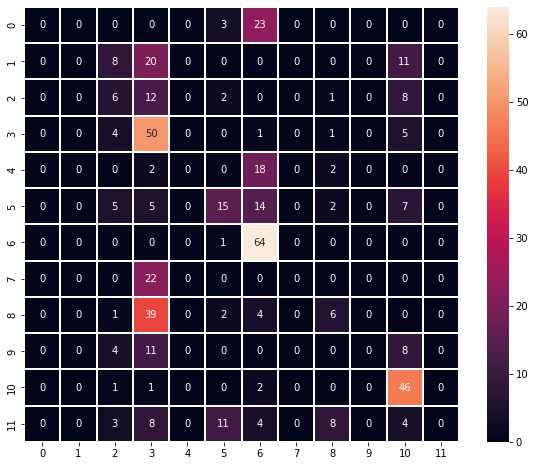

In [47]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

### Observations

- This model didn't perform so well after included class weight too. 
- So, we can try second model with more layers and Batch normalization.

# Model-2 - Batch Normalization and Dropout

As we can see, our initial model is not so accurate. Therefore we'll try to address this problem with Batch Normalization and class_weight to check if we can improve the model's performance.

In [59]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [60]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [61]:
#intializing a sequential model
model_1 = Sequential()

#adding first conv layer with 64 filters, a kernel size of 3x3, and padding as 'same', which provides the same output size as the input size
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3))) 
model_1.add(MaxPooling2D((2, 2), padding = 'same'))
model_1.add(BatchNormalization())

#adding additional layers
model_1.add(Conv2D(32,(3,3),activation='relu'))
model_1.add(MaxPooling2D(2,2))
model_1.add(BatchNormalization())
model_1.add(Conv2D(32,(3,3),activation='relu'))
model_1.add(MaxPooling2D(2,2))
model_1.add(BatchNormalization())

#flattening the output of the conv layer after max pooling
model_1.add(Flatten())

#adding fully connected dense layers
model_1.add(Dense(32, activation='relu'))
#adding dropout layers to reduce overfitting
model_1.add(Dropout(0.1))
model_1.add(Dense(32, activation='relu'))

#adding the output layer with 12 neurons and activation function of softmax, since this is a multi-class classification problem  
model_1.add(Dense(num_classes, activation='softmax'))

#using SGD optimizer
#opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()

#compiling model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#generating the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                        

### <b> Fitting the model on the train data

In [62]:
history_1 = model_1.fit(
            X_train_normalized, y_train_encoded,class_weight=class_weights,
            epochs=25,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/25
121/121 - 6s - loss: 2.0410 - accuracy: 0.3842 - val_loss: 4.9756 - val_accuracy: 0.1379 - 6s/epoch - 49ms/step
Epoch 2/25
121/121 - 3s - loss: 1.1611 - accuracy: 0.6280 - val_loss: 5.6090 - val_accuracy: 0.1402 - 3s/epoch - 21ms/step
Epoch 3/25
121/121 - 2s - loss: 0.8304 - accuracy: 0.7302 - val_loss: 5.1534 - val_accuracy: 0.1379 - 2s/epoch - 20ms/step
Epoch 4/25
121/121 - 2s - loss: 0.6076 - accuracy: 0.8011 - val_loss: 1.7651 - val_accuracy: 0.4136 - 2s/epoch - 20ms/step
Epoch 5/25
121/121 - 2s - loss: 0.4712 - accuracy: 0.8443 - val_loss: 2.0253 - val_accuracy: 0.4743 - 2s/epoch - 20ms/step
Epoch 6/25
121/121 - 2s - loss: 0.3416 - accuracy: 0.8851 - val_loss: 1.2875 - val_accuracy: 0.6495 - 2s/epoch - 20ms/step
Epoch 7/25
121/121 - 3s - loss: 0.3084 - accuracy: 0.8984 - val_loss: 0.9765 - val_accuracy: 0.7407 - 3s/epoch - 21ms/step
Epoch 8/25
121/121 - 3s - loss: 0.2616 - accuracy: 0.9114 - val_loss: 1.1171 - val_accuracy: 0.7407 - 3s/epoch - 21ms/step
Epoch 9/25
121/1

### **Model Evaluation**

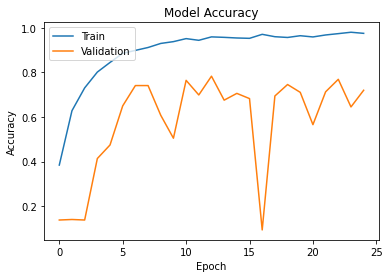

In [63]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   We can see from the above plot that **the training accuracy is little over fitting** validation accuracy looks ok.
*   The model seems to be ok, but we need to calculate the test accuracy

### **Evaluating the model on test data**

In [64]:
accuracy = model_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.6965 - accuracy: 0.7242 - 228ms/epoch - 15ms/step


### **Generating the predictions using test data**

In [65]:
# Here we would get the output as probablities for each category
y_pred_1=model_1.predict(X_test_normalized)

15/15 [==============================] - 0s 7ms/step


In [66]:
y_pred_1

array([[1.06029986e-15, 4.66040536e-19, 1.08066047e-14, ...,
        1.14406791e-11, 4.32874917e-15, 3.49436695e-11],
       [2.52638784e-13, 8.14977197e-10, 1.05624975e-08, ...,
        4.88660277e-08, 9.99741852e-01, 1.55522817e-09],
       [2.09135053e-19, 4.12082455e-16, 1.24951677e-12, ...,
        1.53654216e-12, 1.00000000e+00, 1.21949206e-12],
       ...,
       [7.99209159e-03, 7.82548273e-19, 2.71811518e-10, ...,
        2.49220450e-10, 6.82029682e-13, 1.88813920e-09],
       [9.56658308e-09, 9.57577959e-06, 1.57638788e-04, ...,
        1.23065561e-02, 4.64902521e-04, 2.29996219e-02],
       [3.55501761e-08, 6.38747179e-06, 3.05427966e-06, ...,
        9.26194072e-01, 5.26206940e-02, 1.67511927e-04]], dtype=float32)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

In [67]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_1=np.argmax(y_pred_1,axis=1)
y_test_arg_1=np.argmax(y_test_encoded,axis=1)

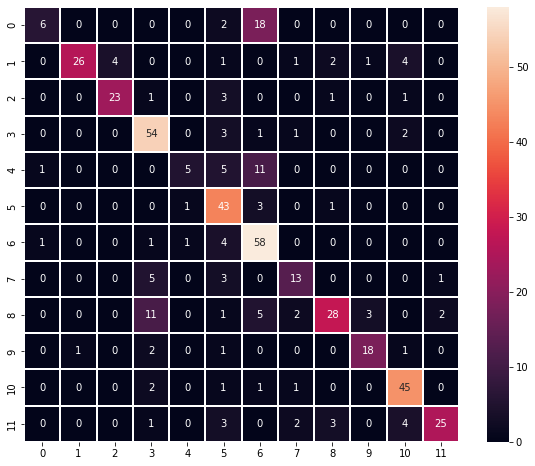

In [68]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_1,y_pred_arg_1)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly. 
- In comparison to the rest, we can see that classes 4, and 8 are having some mis classified items.
- But we can also observe that class 0 has most misclassified entries.

# Model-3

To improve the model for a better accuracy, we can try data augmentation with Batch Normalization as the input size is very less, which will help to improve the model's performance.

## **Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

In [69]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [70]:
#creating Image Data Generator
train_datagen = ImageDataGenerator(horizontal_flip = True,
                              vertical_flip = False, 
                              height_shift_range= 0.2, 
                              width_shift_range=0.2, 
                              rotation_range=20)
     
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [71]:
#intializing a sequential model
model_2 = Sequential()

#adding first conv layer with 128 filters, a kernel size of 3x3, and padding as 'same', which provides the same output size as the input size
# model_2.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3))) # Input_shape denotes input image dimension of images
model_2.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3))) # Input_shape denotes input image dimension of images
#adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
#adding batch normalization to reduce overfitting 
model_2.add(BatchNormalization())

#adding additional layers
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(2, 2))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(2, 2))
model_2.add(BatchNormalization())
model_2.add(Conv2D(16, (3, 3), activation='relu'))
model_2.add(BatchNormalization())

#flattening the output of the conv layer
model_2.add(Flatten())

#adding a fully connected dense layers    
model_2.add(Dense(64, activation='relu'))
#adding dropout layers
model_2.add(Dropout(0.2))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(16, activation='relu'))

#adding the output layer with 12 neurons and activation functions as softmax, since this is a multi-class classification problem  
model_2.add(Dense(num_classes, activation='softmax'))

#using SGD optimizer
#opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()

#compiling model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#generating the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                        

In [73]:
# Epochs
epochs = 20
# Batch size
batch_size = 16

history_2 = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
240/240 [==============================] - 24s 78ms/step - loss: 2.2049 - accuracy: 0.2529 - val_loss: 3.7080 - val_accuracy: 0.1495
Epoch 2/20
240/240 [==============================] - 18s 75ms/step - loss: 1.8345 - accuracy: 0.3665 - val_loss: 2.5106 - val_accuracy: 0.2921
Epoch 3/20
240/240 [==============================] - 23s 94ms/step - loss: 1.6705 - accuracy: 0.4200 - val_loss: 1.5662 - val_accuracy: 0.4439
Epoch 4/20
240/240 [==============================] - 17s 71ms/step - loss: 1.5685 - accuracy: 0.4565 - val_loss: 2.1583 - val_accuracy: 0.3808
Epoch 5/20
240/240 [==============================] - 19s 77ms/step - loss: 1.4854 - accuracy: 0.4923 - val_loss: 3.8281 - val_accuracy: 0.2407
Epoch 6/20
240/240 [==============================] - 17s 71ms/step - loss: 1.4243 - accuracy: 0.5027 - val_loss: 1.2793 - val_accuracy: 0.5818
Epoch 7/20
240/240 [==============================] - 17s 71ms/step - loss: 1.3502 - accuracy: 0.5356 - val_loss: 1.2598 - val_accuracy:

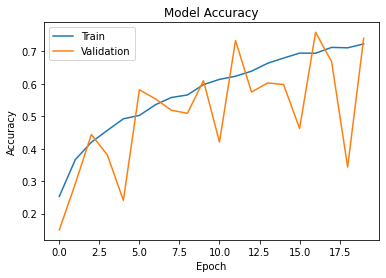

In [74]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**There are so many ups and downs in the Validation accuracy. But finally both train and validation ended with almost equal accuracy**

In [75]:
accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.7893 - accuracy: 0.7684 - 509ms/epoch - 34ms/step


### This model is clearly overfitting. Training accuracy is very high, but validation and test accuracies are very low. 

In [76]:
# Here we would get the output as probablities for each category
y_pred_2=model_2.predict(X_test_normalized)

15/15 [==============================] - 0s 13ms/step


In [77]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_2=np.argmax(y_pred_2,axis=1)
y_test_arg_2=np.argmax(y_test_encoded,axis=1)

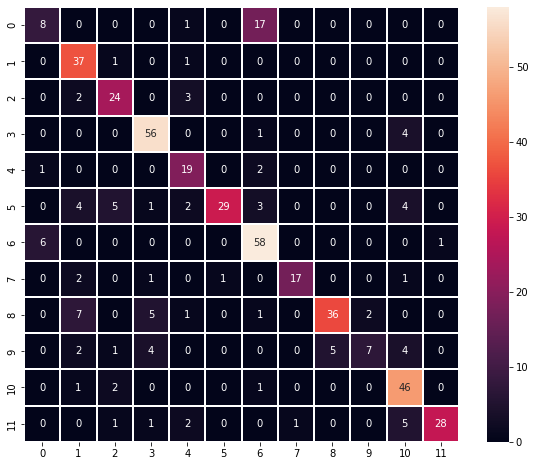

In [78]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_2,y_pred_arg_2)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**
- The confusion matrix appear good compare to the previous models. 
- The 0th class is the most confused class among all.
- We can observe that this model did perform well like that pervious and its not overfitting too.

# Model- 4

# Transfer Learning using VGG16

- Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.


In [79]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [80]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [81]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

#vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128,128,3))
vgg_model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [82]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [83]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.1))
new_model.add(Dense(16, activation='relu'))

#adding the output layer with 12 neurons and activation functions as softmax, since this is a multi-class classification problem  
new_model.add(Dense(num_classes, activation='softmax'))

#Optimizer
opt=Adam()

# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 32)                262176    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,977,596
Trainable params: 262,908
Non-t

In [84]:
# Epochs
epochs = 20
# Batch size
batch_size = 16

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
241/241 [==============================] - 27s 99ms/step - loss: 2.2509 - accuracy: 0.2217 - val_loss: 1.9325 - val_accuracy: 0.3364
Epoch 2/20
241/241 [==============================] - 19s 77ms/step - loss: 1.8781 - accuracy: 0.3434 - val_loss: 1.7341 - val_accuracy: 0.4019
Epoch 3/20
241/241 [==============================] - 18s 75ms/step - loss: 1.6885 - accuracy: 0.4058 - val_loss: 1.5841 - val_accuracy: 0.4346
Epoch 4/20
241/241 [==============================] - 19s 80ms/step - loss: 1.5839 - accuracy: 0.4242 - val_loss: 1.4195 - val_accuracy: 0.4907
Epoch 5/20
241/241 [==============================] - 18s 74ms/step - loss: 1.5077 - accuracy: 0.4523 - val_loss: 1.3972 - val_accuracy: 0.5047
Epoch 6/20
241/241 [==============================] - 21s 86ms/step - loss: 1.4402 - accuracy: 0.4731 - val_loss: 1.3337 - val_accuracy: 0.5093
Epoch 7/20
241/241 [==============================] - 18s 75ms/step - loss: 1.4034 - accuracy: 0.4983 - val_loss: 1.3113 - val_accuracy:

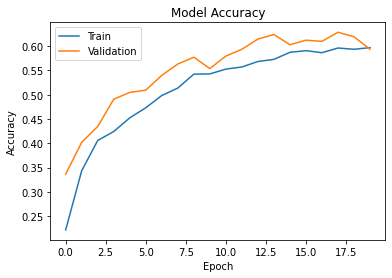

In [85]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [86]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 2s - loss: 1.1466 - accuracy: 0.5895 - 2s/epoch - 120ms/step


In [87]:
# Here we would get the output as probablities for each category
y_pred_new=new_model.predict(X_test_normalized)

15/15 [==============================] - 1s 43ms/step


In [88]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_new=np.argmax(y_pred_new,axis=1)
y_test_arg_new=np.argmax(y_test_encoded,axis=1)

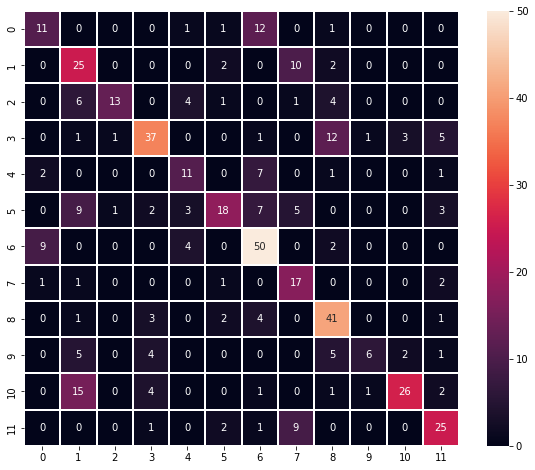

In [89]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_new,y_pred_arg_new)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

### Observation

- This model is clearly not overfitting
- But the performance is not so good as we can see the low accuracy
- Classes 0, 1, 3 and 10 are very poorly predicted among other classes

# Model-5 with pre-trained model & early stopping

To improve the above model, we are just trying to modify the model little bit. Also we can do early stopping as the validation accuracy is always so fluctuating. 

In [90]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [91]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### using the same VGG model 

In [92]:
#creating new sequential model
model_3 = Sequential()

#adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

#flattening the output of the VGG16 model
model_3.add(Flatten())

#adding the fully connected dense layers    
model_3.add(Dense(64, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(32, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(16, activation='relu'))

#adding the output layer with 12 neurons and activation functions as softmax, since this is a multi-class classification problem  
model_3.add(Dense(num_classes, activation='softmax'))

#using SGD optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

#compiling model
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#generating the summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [93]:
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_3 = model_3.fit(
            X_train_normalized, y_train_encoded,
            epochs=15,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=16,
            verbose=2,callbacks=[es, mc])

Epoch 1/15

Epoch 1: val_accuracy improved from -inf to 0.13785, saving model to best_model.h5
241/241 - 8s - loss: 1.8506 - accuracy: 0.3657 - val_loss: 3.9952 - val_accuracy: 0.1379 - 8s/epoch - 31ms/step
Epoch 2/15

Epoch 2: val_accuracy improved from 0.13785 to 0.49766, saving model to best_model.h5
241/241 - 6s - loss: 1.3470 - accuracy: 0.5251 - val_loss: 1.5802 - val_accuracy: 0.4977 - 6s/epoch - 25ms/step
Epoch 3/15

Epoch 3: val_accuracy improved from 0.49766 to 0.52804, saving model to best_model.h5
241/241 - 6s - loss: 1.1624 - accuracy: 0.5919 - val_loss: 1.4089 - val_accuracy: 0.5280 - 6s/epoch - 24ms/step
Epoch 4/15

Epoch 4: val_accuracy improved from 0.52804 to 0.58178, saving model to best_model.h5
241/241 - 6s - loss: 1.0407 - accuracy: 0.6389 - val_loss: 1.2436 - val_accuracy: 0.5818 - 6s/epoch - 25ms/step
Epoch 5/15

Epoch 5: val_accuracy improved from 0.58178 to 0.59346, saving model to best_model.h5
241/241 - 6s - loss: 0.9641 - accuracy: 0.6587 - val_loss: 1.3932

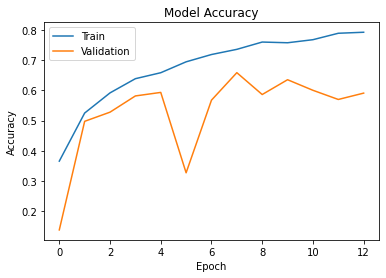

In [94]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [95]:
accuracy = model_3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 1.3402 - accuracy: 0.6000 - 676ms/epoch - 45ms/step


In [96]:
# Here we would get the output as probablities for each category
y_pred_3=model_3.predict(X_test_normalized)

15/15 [==============================] - 1s 41ms/step


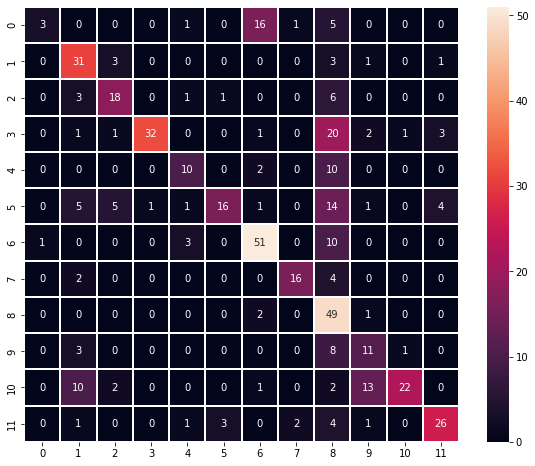

In [97]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_3=np.argmax(y_pred_3,axis=1)
y_test_arg_3=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_3,y_pred_arg_3)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that many classes are not predicted correctly. 
- In comparison to the rest, we can see that classes 0 and 3 are having some mis classified items.
- But we can also observe that class 10 has most misclassified entries.
- According to the confusion matrix this VGG model also didn't perform so well.

## **Visualizing the prediction:**

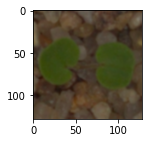

1/1 [==============================] - 1s 626ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


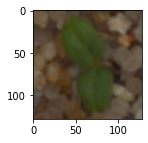

1/1 [==============================] - 0s 22ms/step
Predicted Label ['Common wheat']
True Label Cleavers


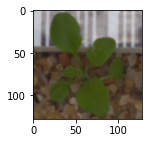

1/1 [==============================] - 0s 23ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Shepherds Purse


In [99]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[2].reshape(1,128,128,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[33].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[36].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

### Classification Report for each class

Precision: precision is the fraction of relevant instances among the retrieved instances.

Recall: recall is the fraction of relevant instances that were retrieved.

F1 score: The F1 score is the harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.

In [100]:
print(classification_report((y_test_arg_1), y_pred_arg_1))

              precision    recall  f1-score   support

           0       0.75      0.23      0.35        26
           1       0.96      0.67      0.79        39
           2       0.85      0.79      0.82        29
           3       0.70      0.89      0.78        61
           4       0.71      0.23      0.34        22
           5       0.61      0.90      0.73        48
           6       0.60      0.89      0.72        65
           7       0.65      0.59      0.62        22
           8       0.80      0.54      0.64        52
           9       0.82      0.78      0.80        23
          10       0.79      0.90      0.84        50
          11       0.89      0.66      0.76        38

    accuracy                           0.72       475
   macro avg       0.76      0.67      0.68       475
weighted avg       0.75      0.72      0.71       475



In [101]:
print(classification_report((y_test_arg_2), y_pred_arg_2))

              precision    recall  f1-score   support

           0       0.53      0.31      0.39        26
           1       0.67      0.95      0.79        39
           2       0.71      0.83      0.76        29
           3       0.82      0.92      0.87        61
           4       0.66      0.86      0.75        22
           5       0.97      0.60      0.74        48
           6       0.70      0.89      0.78        65
           7       0.94      0.77      0.85        22
           8       0.88      0.69      0.77        52
           9       0.78      0.30      0.44        23
          10       0.72      0.92      0.81        50
          11       0.97      0.74      0.84        38

    accuracy                           0.77       475
   macro avg       0.78      0.73      0.73       475
weighted avg       0.79      0.77      0.76       475



In [102]:
print(classification_report((y_test_arg_new), y_pred_arg_new))

              precision    recall  f1-score   support

           0       0.48      0.42      0.45        26
           1       0.40      0.64      0.49        39
           2       0.87      0.45      0.59        29
           3       0.73      0.61      0.66        61
           4       0.48      0.50      0.49        22
           5       0.67      0.38      0.48        48
           6       0.60      0.77      0.68        65
           7       0.40      0.77      0.53        22
           8       0.59      0.79      0.68        52
           9       0.75      0.26      0.39        23
          10       0.84      0.52      0.64        50
          11       0.62      0.66      0.64        38

    accuracy                           0.59       475
   macro avg       0.62      0.56      0.56       475
weighted avg       0.64      0.59      0.59       475



In [103]:
print(classification_report((y_test_arg_3), y_pred_arg_3))

              precision    recall  f1-score   support

           0       0.75      0.12      0.20        26
           1       0.55      0.79      0.65        39
           2       0.62      0.62      0.62        29
           3       0.97      0.52      0.68        61
           4       0.59      0.45      0.51        22
           5       0.80      0.33      0.47        48
           6       0.69      0.78      0.73        65
           7       0.84      0.73      0.78        22
           8       0.36      0.94      0.52        52
           9       0.37      0.48      0.42        23
          10       0.92      0.44      0.59        50
          11       0.76      0.68      0.72        38

    accuracy                           0.60       475
   macro avg       0.69      0.58      0.58       475
weighted avg       0.71      0.60      0.60       475



###  Results of models executed with Class_weight due to imbalance

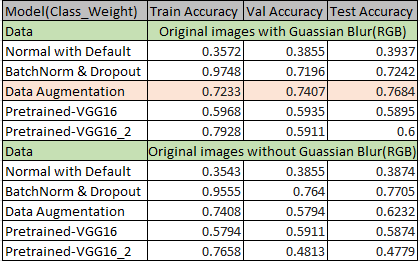

## Conclusion

- From all the above confusion matrix we can observe that our model with Data Augmentation fits best because it predicted the majority of the classes better than the other models.
- The test accuracy of the model is 77%.
- Original CNN model with Batch normalization and Dropout also helped in improving the sample inputs, but somehow it didn't help so much in model improvements. Also, its overfitting. 
- Models tried with pre-trained VGG16 are either overfitting or not performing well.
- Also all the models are executed without Guassian Blur. The results are almost similar. 

#### Also executed the same models with below combinations and without Class weight. But those models are not included in the notebook as the performances are not so satisfactory. 

#### If at the the accuracy is little more than the above model, this is little overfitting.

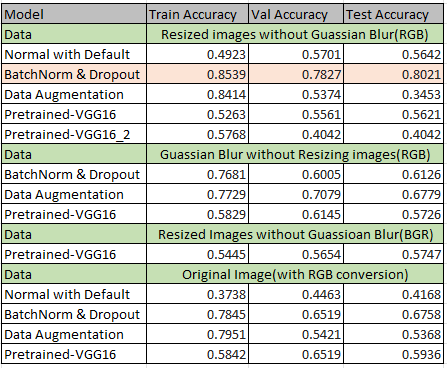

## Scope of Improvement

- These models can be further improved by training with different filter sizes and different number of filters. 
- These models can also be trained on the Resized images and pre trained models with some modification.
- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.
- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.
- Maybe we can try different Data Augmentation and different pretrained model for better result.
- For class imbalance more methods or stratagies can be used to improve further. 
- All of these models would most likely improve by having more images available of less well-represented plants during training
- Different combinations of hyperparameters in the convolutional layers and ANN layers can be tested to improve the model performance, such as through a randomized grid search
- Some Classes like Black grass are having most of the misclassified entries maybe because of the smaller size of it. Trying different filters/kernel may help to identify the specific edges of it. 